## Set Up

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.10f}'.format)
pd.set_option('display.float_format', lambda x: ('%f' % x).rstrip('0').rstrip('.'))

In [9]:
df = pd.read_csv('sales_data.csv')
df.head()

,Order ID,Sale ID,Date,Order,Transaction type,Sale type,Sales channel,POS location,Billing country,Billing region,Billing city,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Product,Variant,Variant SKU,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales
0,5539800000000,17401000000000,2024-01-01T14:06:18-05:00,#2069,product,order,Point of Sale,Boutique Site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brown jeans,NaN,NaN,1,5,0,0,5,0,0.3,5.3
1,5539800000000,17401000000000,2024-01-01T14:08:17-05:00,#2070,product,order,Point of Sale,Boutique Site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black n white body suit,NaN,NaN,1,5,0,0,5,0,0.3,5.3
2,5539800000000,17401000000000,2024-01-01T14:08:17-05:00,#2070,product,order,Point of Sale,Boutique Site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black halter body suit,NaN,NaN,1,5,0,0,5,0,0.3,5.3
3,5539970000000,17401500000000,2024-01-01T16:50:20-05:00,#2071,product,order,Point of Sale,Boutique Site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequence dress brown white tan,NaN,NaN,1,9,0,0,9,0,0.54,9.54
4,5539970000000,17401500000000,2024-01-01T16:50:20-05:00,#2071,product,order,Point of Sale,Boutique Site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blue wool dress with belt,NaN,NaN,1,9,0,0,9,0,0.54,9.54


## EDA

In [10]:
for col in df.columns:
    if col!='Date':
        print(f'Count of unique identifiers for {col}: {df[col].nunique()}\n')

# No column can be used as primary key

Count of unique identifiers for Order ID: 207

Count of unique identifiers for Sale ID: 172

Count of unique identifiers for Order: 230

Count of unique identifiers for Transaction type: 4

Count of unique identifiers for Sale type: 2

Count of unique identifiers for Sales channel: 3

Count of unique identifiers for POS location: 1

Count of unique identifiers for Billing country: 2

Count of unique identifiers for Billing region: 6

Count of unique identifiers for Billing city: 14

Count of unique identifiers for Shipping country: 2

Count of unique identifiers for Shipping region: 5

Count of unique identifiers for Shipping city: 5

Count of unique identifiers for Product type: 21

Count of unique identifiers for Product vendor: 12

Count of unique identifiers for Product: 270

Count of unique identifiers for Variant: 38

Count of unique identifiers for Variant SKU: 64

Count of unique identifiers for Net quantity: 5

Count of unique identifiers for Gross sales: 71

Count of unique i

In [11]:
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Date' and col != 'Order':
        print(f'Unique values for {col}: {df[col].unique()} \n')

Unique values for Transaction type: ['product' 'shipping' 'unknown' 'gift_card'] 

Unique values for Sale type: ['order' 'return'] 

Unique values for Sales channel: ['Point of Sale' 'Online Store' 'Shop'] 

Unique values for POS location: ['Boutique Site' nan] 

Unique values for Billing country: [nan 'United States' 'Canada'] 

Unique values for Billing region: [nan 'Ohio' 'Arkansas' 'Kentucky' 'North Carolina' 'Ontario' 'Alabama'] 

Unique values for Billing city: [nan 'Cincinnati' 'Bryant' 'Covington' 'Independence' 'Union' 'Lexington'
 'Florence' 'Blue Ash' 'Ft. Mitchell' 'Crestview Hills' 'Charlotte'
 'Fairfield' 'Toronto' 'Daphne'] 

Unique values for Shipping country: [nan 'United States' 'Canada'] 

Unique values for Shipping region: [nan 'Ohio' 'Arkansas' 'North Carolina' 'Ontario' 'Alabama'] 

Unique values for Shipping city: [nan 'Blue Ash' 'Bryant' 'Charlotte' 'Toronto' 'Daphne'] 

Unique values for Product type: [nan 'sale' 'Athletics' '2 Piece Set' 'dresses' 'Accessories

In [12]:
# Drop Billing-related columns, POS location
df.drop(columns = ['Billing country', 'Billing region', 'Billing city', 'POS location', 'Variant SKU'], inplace=True)

/var/folders/lt/42qswnrj5_3cd5pgfvbrqrk00000gn/T/ipykernel_19079/2674100088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")


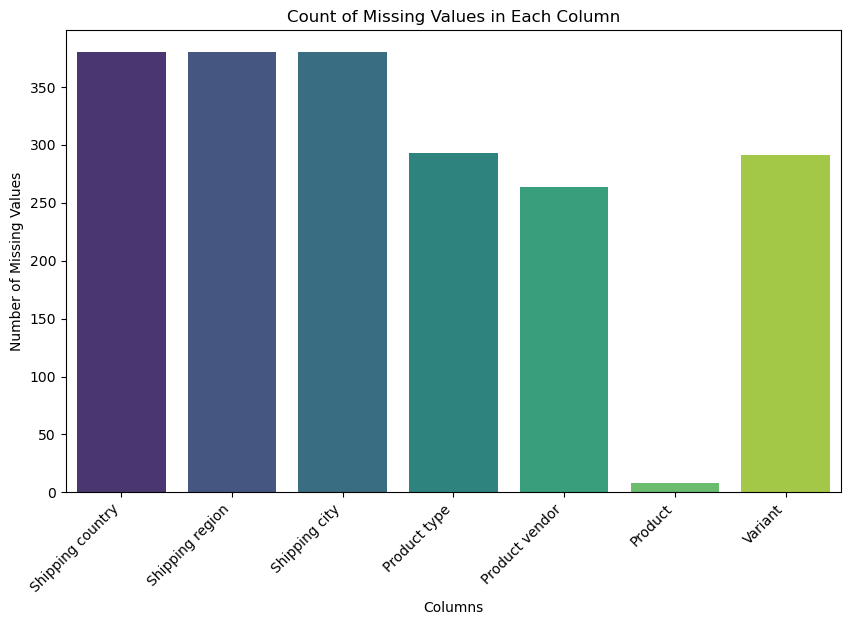

In [13]:
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0]  # Filter only columns with missing values

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Count of Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()

In [14]:
df[(df['Gross sales'] != df['Net sales'])].head()

,Order ID,Sale ID,Date,Order,Transaction type,Sale type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Product,Variant,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales
17,5547170000000,17420000000000,2024-01-06T14:12:18-05:00,#2084,product,order,Point of Sale,NaN,NaN,NaN,NaN,NaN,Grey Hat,NaN,1,15,-3,0,12,0,0.72,12.72
30,5547370000000,17420500000000,2024-01-06T16:58:34-05:00,#2089,product,order,Point of Sale,NaN,NaN,NaN,NaN,NaN,Candy color pant jumpsuit,NaN,1,5,-5,0,0,0,0,0
64,5552290000000,17444600000000,2024-01-12T18:45:22-05:00,#2098,unknown,return,Online Store,United States,Arkansas,Bryant,NaN,NaN,NaN,NaN,0,0,0,-9,-9,0,0,-9
65,5552290000000,17441200000000,2024-01-12T18:45:22-05:00,#2098,product,return,Online Store,United States,Arkansas,Bryant,sale,Inspired Fashion 40,Sale,Large,-1,0,0,-9,-9,0,0,-9
66,5552290000000,17441200000000,2024-01-12T18:45:22-05:00,#2098,unknown,return,Online Store,United States,Arkansas,Bryant,NaN,NaN,NaN,NaN,0,0,0,9,9,0,0,9


In [15]:
df[df['Returns']!=0].head()

,Order ID,Sale ID,Date,Order,Transaction type,Sale type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Product,Variant,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales
64,5552290000000,17444600000000,2024-01-12T18:45:22-05:00,#2098,unknown,return,Online Store,United States,Arkansas,Bryant,NaN,NaN,NaN,NaN,0,0,0,-9,-9,0,0,-9
65,5552290000000,17441200000000,2024-01-12T18:45:22-05:00,#2098,product,return,Online Store,United States,Arkansas,Bryant,sale,Inspired Fashion 40,Sale,Large,-1,0,0,-9,-9,0,0,-9
66,5552290000000,17441200000000,2024-01-12T18:45:22-05:00,#2098,unknown,return,Online Store,United States,Arkansas,Bryant,NaN,NaN,NaN,NaN,0,0,0,9,9,0,0,9
244,5619390000000,17699900000000,2024-03-20T22:26:17-04:00,#2179,product,return,Point of Sale,NaN,NaN,NaN,dresses,Inspired Fashion 40,Mustard Silk Dress,Medium,-1,0,0,-63.91,-63.91,0,-3.83,-67.74
245,5619390000000,17699900000000,2024-03-20T22:26:17-04:00,#2179,product,return,Point of Sale,NaN,NaN,NaN,NaN,NaN,Lipstick,NaN,-1,0,0,-5,-5,0,-0.3,-5.3


### Clean Variant column

In [16]:
data = df['Variant'].copy()

In [17]:
size_pattern = r"(XXXL|3XL|2XL|1XL|XL|L|M|S|small|medium|large)"
color_pattern = r"(Black|Red|Green|Blue|Cream|Navy|Pink|Oatmeal|Hunter Green|Off White|Rose Pink|LIGHT BLUE)"
style_pattern = r"(Plus Size|Contemporary|Ring|Charms)"

In [18]:
def extract_variant(variant):
    if pd.isna(variant):
        return pd.Series([np.nan, np.nan, np.nan], index = ['size', 'color', 'style'])
    
    size = re.search(size_pattern, variant, re.IGNORECASE)
    color = re.search(color_pattern, variant, re.IGNORECASE)
    style = re.search(style_pattern, variant, re.IGNORECASE)

    return pd.Series([size.group(0).capitalize() if size else np.nan, 
                      color.group(0).capitalize() if color else np.nan, #group(0) means match the entire correction
                      style.group(0).capitalize() if style else np.nan], 
                    index=['size','color','style'])

df[['size', 'color', 'style']] = df['Variant'].apply(extract_variant)
df.drop(columns=['Variant'], inplace=True)

### Clean Product type

In [19]:
df['Product type'] = df['Product type'].str.capitalize()
product_type_mapping = {
    'dress': 'Dresses', 
    'bracelet': 'Accessories', 
    'earrings': 'Accessories',
    'jumpsuit': 'Jumpsuits & Rompers', 
    'jumpsuits & rompers': 'Jumpsuits & Rompers',
    'gift card': 'Gift Cards'
}

df['Product type'] = df['Product type'].str.lower().map(product_type_mapping).fillna(df['Product type'])
df['Product type'] = df['Product type'].str.capitalize()

In [20]:
sorted(df['Product type'].dropna().unique().tolist())

['2 piece set',
 'Accessories',
 'Apparel & accessories',
 'Athletics',
 'Blazers',
 'Coats & jackets',
 'Dresses',
 'Gift cards',
 'Jumpsuits & rompers',
 'Pants',
 'Sale',
 'Shirt',
 'Shirts & tops',
 'Shorts',
 'Skirt suits']

### Clean Transaction

In [21]:
df['Transaction type']=df['Transaction type'].str.capitalize()

In [22]:
df['Transaction type'].unique()

array(['Product', 'Shipping', 'Unknown', 'Gift_card'], dtype=object)

### Clean Sale type, Sales channel

In [23]:
df['Sale type'].isna().sum()
# Safe to split to return and order dfs

0

In [24]:
return_df = df[df['Sale type']=='return']
order_df = df[df['Sale type']=='order']

return_df.drop(columns=['Sale type'], inplace = True)
order_df.drop(columns=['Sale type'], inplace = True)

/var/folders/lt/42qswnrj5_3cd5pgfvbrqrk00000gn/T/ipykernel_19079/1579962941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df.drop(columns=['Sale type'], inplace = True)
/var/folders/lt/42qswnrj5_3cd5pgfvbrqrk00000gn/T/ipykernel_19079/1579962941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df.drop(columns=['Sale type'], inplace = True)


In [25]:
#Check if return transactions having Order ID in order_id
return_df['Order ID'].isin(order_df['Order ID'])

64     True
65     True
66     True
243    True
244    True
245    True
246    True
247    True
249    True
273    True
282    True
283    True
284    True
308    True
Name: Order ID, dtype: bool

In [26]:
return_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 64 to 308
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          14 non-null     float64
 1   Sale ID           14 non-null     float64
 2   Date              14 non-null     object 
 3   Order             14 non-null     object 
 4   Transaction type  14 non-null     object 
 5   Sales channel     14 non-null     object 
 6   Shipping country  4 non-null      object 
 7   Shipping region   4 non-null      object 
 8   Shipping city     4 non-null      object 
 9   Product type      7 non-null      object 
 10  Product vendor    9 non-null      object 
 11  Product           11 non-null     object 
 12  Net quantity      14 non-null     int64  
 13  Gross sales       14 non-null     float64
 14  Discounts         14 non-null     float64
 15  Returns           14 non-null     float64
 16  Net sales         14 non-null     float64
 17  Sh

In [27]:
# Exclue the transactions that were returned later from the order_df
order_df = order_df[~order_df['Order ID'].isin(return_df['Order ID'])]

## Oct 26th Checkpoint

- Finished splitting `order` and `return` transactions into 2 dataframes: `order_df`, `return_df`
- Finished categorizing the style/color/pattern for `Variant` column into 3 new columns

In [28]:
pd.DataFrame(return_df.isna().sum())

,0
Order ID,0
Sale ID,0
Date,0
Order,0
Transaction type,0
...,...
Taxes,0
Total sales,0
size,6
color,13


In [29]:
pd.DataFrame(order_df.isna().sum())

,0
Order ID,0
Sale ID,0
Date,0
Order,0
Transaction type,0
...,...
Taxes,0
Total sales,0
size,279
color,339
